In [ ]:
import liana as li

In [ ]:
import scanpy as sc

In [ ]:
def beautiful_cmap(initial_cmap="Reds", grey_intensity=0.2, color_intencity=0.1):

    from matplotlib import cm
    from matplotlib.colors import ListedColormap
    import numpy as np

    cm_color = cm.get_cmap(initial_cmap, 128)
    cm_grey = cm.get_cmap("Greys", 128)

    c = ListedColormap(
        np.vstack(
            (cm_grey(np.linspace(0.2, 0.2, 1)),
             cm_color(np.linspace(0.1, 1, 128)))
    ))

    return c

reds_cmap = beautiful_cmap()
blues_cmap = beautiful_cmap("Blues")
rb_cmap = beautiful_cmap("RdBu_r")

/tmp/ipykernel_3333181/2786226622.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
/tmp/ipykernel_3333181/2786226622.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


In [ ]:
adata = sc.read_h5ad('adata_epcam_cluster_annotation.h5ad')

In [ ]:
adata

AnnData object with n_obs × n_vars = 42129 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

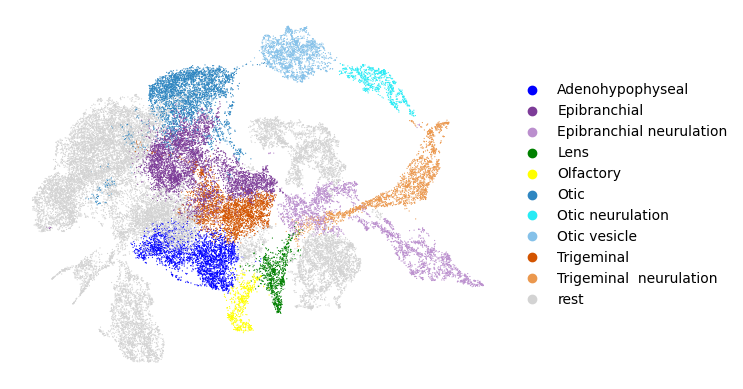

In [ ]:
sc.pl.umap(adata, color='cluster_annotations', title='', frameon=False)

In [ ]:
with open('/home/julia/TF/allTFs_mm.txt', 'r') as file:
    list_TF = []
    for line in file.read().split('\n'):

                list_TF.append(line)

#print(list_TF)

In [ ]:
target_clusters = [
    "Adenohypophyseal",
    "Epibranchial",
    "Lens",
    "Olfactory",
    "Otic",
    "Trigeminal"
]

# Subset AnnData to just these clusters
adata_subset = adata[adata.obs['cluster_annotations'].isin(target_clusters)].copy()


In [ ]:
import numpy as np
import scipy.sparse as sp

group_key = "cluster_annotations"   # your column in adata.obs
min_frac = 0.05                     # 5%

# choose matrix: prefer raw counts if present, else current X
X = adata.raw.X if adata.raw is not None else adata.X
X = X.tocsr() if sp.issparse(X) else X

groups = adata.obs[group_key].astype("category")
clusters = list(groups.cat.categories)

genes_by_cluster = {}

for cl in clusters:
    idx = np.where(groups == cl)[0]
    if idx.size == 0:
        genes_by_cluster[cl] = []
        continue

    if sp.issparse(X):
        frac = (X[idx, :] > 0).mean(axis=0).A1  # fraction of cells with nonzero expr
    else:
        frac = (X[idx, :] > 0).mean(axis=0)

    genes_by_cluster[cl] = adata.var_names[frac >= min_frac].tolist()

# optional: store in .uns for later use
adata.uns["genes_≥5pct_by_cluster"] = genes_by_cluster

# quick peek
for cl in clusters[:3]:
    print(cl, len(genes_by_cluster[cl]), "genes (≥5% cells)")


Adenohypophyseal 9718 genes (≥5% cells)
Epibranchial 9941 genes (≥5% cells)
Epibranchial neurulation 11231 genes (≥5% cells)


In [ ]:
clusters

['Adenohypophyseal',
 'Epibranchial',
 'Epibranchial neurulation',
 'Lens',
 'Olfactory',
 'Otic',
 'Otic neurulation',
 'Otic vesicle',
 'Trigeminal',
 'Trigeminal  neurulation',
 'rest']

In [ ]:
# Access all genes for a specific cluster
adenohypo_genes = genes_by_cluster['Adenohypophyseal']
print(len(adenohypo_genes))
#print(adenohypo_genes[:10])  # first 10 genes


9718


In [ ]:
Epibranchial_genes = genes_by_cluster['Epibranchial']
len(Epibranchial_genes)

9941

In [ ]:
Lens_genes = genes_by_cluster['Lens']
len(Lens_genes)

11089

In [ ]:
Olfactory_genes = genes_by_cluster['Olfactory']
len(Olfactory_genes)

11526

In [ ]:
Otic_genes = genes_by_cluster['Otic']
len(Otic_genes)

9763

In [ ]:
Trigeminal_genes = genes_by_cluster['Trigeminal']
len(Trigeminal_genes)

9670

In [ ]:
# Function to get TFs from a gene list
def intersect_with_TFs(genes, tf_list):
    return list(set(genes) & set(tf_list))

# Example: intersections for each cluster
adenohypo_TFs = intersect_with_TFs(adenohypo_genes, list_TF)
epibranchial_TFs = intersect_with_TFs(Epibranchial_genes, list_TF)
lens_TFs = intersect_with_TFs(Lens_genes, list_TF)
olfactory_TFs = intersect_with_TFs(Olfactory_genes, list_TF)
otic_TFs = intersect_with_TFs(Otic_genes, list_TF)
trigeminal_TFs = intersect_with_TFs(Trigeminal_genes, list_TF)

# Print counts
print("Adenohypophyseal TFs:", len(adenohypo_TFs))
print("Epibranchial TFs:", len(epibranchial_TFs))
print("Lens TFs:", len(lens_TFs))
print("Olfactory TFs:", len(olfactory_TFs))
print("Otic TFs:", len(otic_TFs))
print("Trigeminal TFs:", len(trigeminal_TFs))

Adenohypophyseal TFs: 994
Epibranchial TFs: 998
Lens TFs: 1115
Olfactory TFs: 1164
Otic TFs: 969
Trigeminal TFs: 979


In [ ]:
# Put all TF lists into a dictionary
cluster_TFs = {
    "Adenohypophyseal": set(adenohypo_TFs),
    "Epibranchial": set(epibranchial_TFs),
    "Lens": set(lens_TFs),
    "Olfactory": set(olfactory_TFs),
    "Otic": set(otic_TFs),
    "Trigeminal": set(trigeminal_TFs)
}

# Find TFs common to all clusters
common_TFs = set.intersection(*cluster_TFs.values())

# Remove common TFs from each cluster
unique_cluster_TFs = {cluster: tf_set - common_TFs for cluster, tf_set in cluster_TFs.items()}

# Print new counts
for cluster, tfs in unique_cluster_TFs.items():
    print(f"{cluster} unique TFs: {len(tfs)}")


Adenohypophyseal unique TFs: 92
Epibranchial unique TFs: 96
Lens unique TFs: 213
Olfactory unique TFs: 262
Otic unique TFs: 67
Trigeminal unique TFs: 77


In [ ]:
import pandas as pd
adata_sub = adata[adata.obs['cluster_annotations'].isin(target_clusters)].copy()
adata_sub.obs['cluster_annotations'] = (
    adata_sub.obs['cluster_annotations'].astype(str).str.strip()
)

# 2) Your intended order (no extra spaces!)
desired_order = [
    "Olfactory", "Lens", "Adenohypophyseal",
    "Trigeminal", "Otic", "Epibranchial"
]

# 3) Keep only categories that exist (avoids KeyError)
present = [c for c in desired_order
           if c in adata_sub.obs['cluster_annotations'].unique()]

# 4) Make it an ordered categorical
adata_sub.obs['cluster_annotations'] = adata_sub.obs['cluster_annotations'].astype(
    pd.api.types.CategoricalDtype(categories=present, ordered=True)
)


In [ ]:
# Define the order you want
desired_order = [    "Olfactory",  "Lens",    "Adenohypophyseal",   "Trigeminal",     "Otic" , "Epibranchial"]

# Ensure the column is categorical with the right order
adata_sub.obs["cluster_annotations"] = adata_sub.obs["cluster_annotations"].astype(
    pd.CategoricalDtype(categories=desired_order, ordered=True)
)

## Heatmaps

# otic_list

In [ ]:
def beautiful_cmap(initial_cmap="Reds", grey_value=0.85):
    from matplotlib import cm
    from matplotlib.colors import ListedColormap
    import numpy as np

    # Main color map (positive values)
    cm_color = cm.get_cmap(initial_cmap, 256)

    # Create array for new cmap: first color is grey, rest from original cmap
    colors = cm_color(np.linspace(0, 1, 256))
    colors[0] = [grey_value, grey_value, grey_value, 1.0]  # RGBA grey for zero

    return ListedColormap(colors)

reds_cmap = beautiful_cmap("Reds")
blues_cmap = beautiful_cmap("Blues")
rb_cmap = beautiful_cmap("RdBu_r")


/tmp/ipykernel_3333181/1188085575.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


In [ ]:
otic_list1=['Ebf3', 'Eif5a2','Ets1', 'Etv4', 'Etv5', 'Gm13212', 'Hmx2',
 'Hmx3', 'Hoxb2', 'Id4', 'Irx1','Lmx1a', 'Luzp2', 'Mitf', 'Pax2',
 'Pax8','Phox2a',  'Prox1','Runx2','Sox10','Sp9','Stat2','Stat5b','Tbx1','Tbx2', 'Zfpm1',]

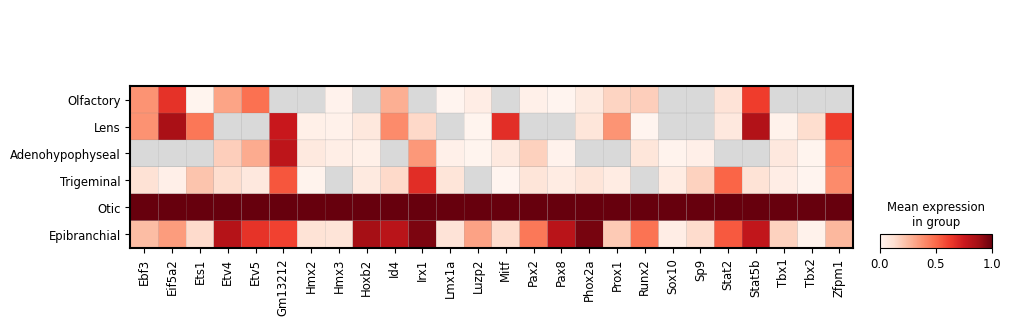

In [ ]:
sc.pl.matrixplot(
    adata_sub,
    var_names=otic_list1,
    groupby='cluster_annotations',
    standard_scale='var', cmap=reds_cmap,  #save='otic_heat.pdf'
)

# trigeminal_list

In [ ]:
trigeminal_list1=['Cbx7','Edn1','Elf3', 'Foxi2','Foxj2', 'Irx3','Irx5','Neurog1','Onecut2','Otx2','Ovol1','Pax7', 'Pou3f1','Pou4f1', 'Stat6',
'Tal2', 'Tfap2b','Zrsr1',  'Foxj2', 'Tal2', 'Zrsr1', 'Zrsr1', 'Onecut2', 'Pou4f1', 'Tal2', 'Onecut2', 'Pou4f1', 'Tal2', 'Tfap2b', 'Elf3', 'Zrsr1', 'Tfap2b', 'Irx3','Irx5','Onecut2','Otx2', 'Pax7', 'Pou4f1', 'Irx3', 'Irx5', 'Onecut2', 'Pax7', 'Pou4f1',]
unique_trigeminal = list(dict.fromkeys(trigeminal_list1))


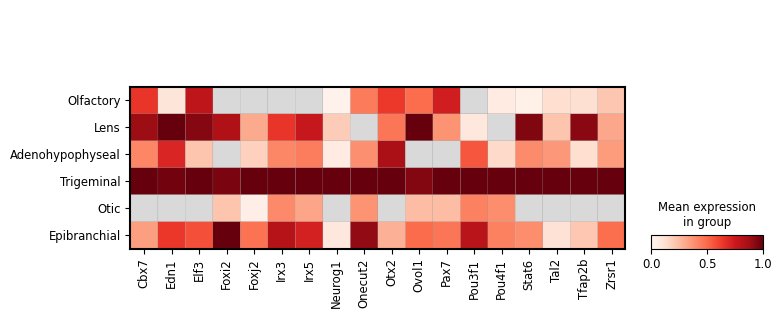

In [ ]:
sc.pl.matrixplot( adata_sub, var_names=unique_trigeminal,  groupby='cluster_annotations', standard_scale='var', cmap=reds_cmap,  #save='trigem_heat.pdf'
                )

## Lens

In [ ]:
unique_lens2=['2010315B03Rik','Snai2', 'Atoh8', 'Barx2','Batf3','Bnc1', 'Bnc2', 'Dlx2', 'Dlx3', 'Ebf4', 'Egr1', 'Esrrg', 'Foxp2', 'Glis1',
 'Gm14305', 'Gm6710', 'Hcfc2', 'Hhat', 'Hif3a', 'Hmx1', 'Ikzf4', 'Irf8', 'Jdp2', 'Kcnip1', 'Klf15', 'Klf2', 'Mafb', 'Msrb3', 'Mterf1a', 'Mxd1',
 'Mycl','Mypop', 'Nnt', 'Nxph3', 'Osr2', 'Prnp','Prrx1','Rbak', 'Rfx5', 'Rpp25', 'Smug1', 'Tceal5', 'Thrb', 'Vdr', 'Zbtb49', 'Zbtb8b', 'Zc3h11a',
 'Zdhhc24', 'Zeb2','Zfp169', 'Zfp189', 'Zfp202', 'Zfp276', 'Zfp28', 'Zfp316', 'Zfp319','Zfp324', 'Zfp354a', 'Zfp429',
 'Zfp454', 'Zfp458', 'Zfp493','Zfp57', 'Zfp707', 'Zfp72', 'Zfp764', 'Zfp775', 'Zfp811','Zfp882',
 'Zfp947', 'Zfp951', 'Zhx3', 'Zkscan14', 'Zkscan2', 'Zkscan6', 'Arg1','Cptp', 'Dmrta2',
 'Creb3', 'Klf11','Sp6','Zfp119a', 'Zfp984', 'Zfp82','Adarb1', 'Carf', 'Pax6', 'Nfatc4']

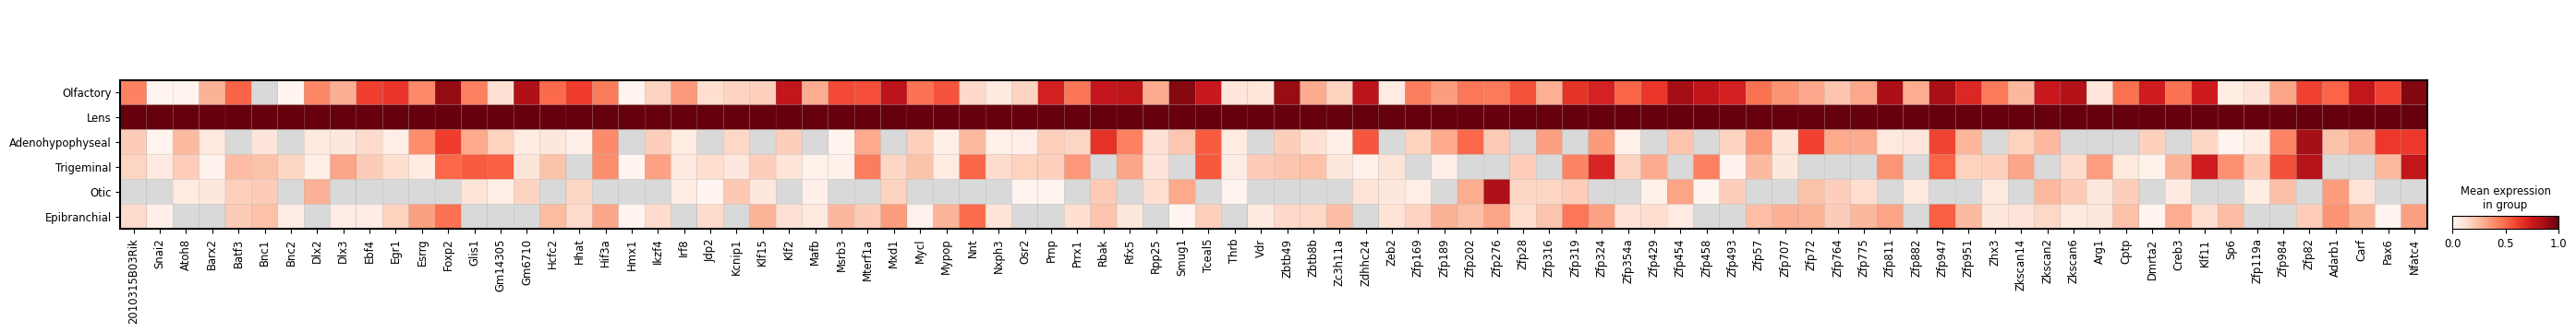

In [ ]:
sc.pl.matrixplot(
    adata_sub,
    var_names=unique_lens2,
    groupby='cluster_annotations',
    standard_scale='var', cmap=reds_cmap,   #save='lense_heat.pdf'
   # use_raw=True
)

# olfactory

In [ ]:
olfactory_list1 =['Arg2', 'Arntl', 'Ascl1','BC025920', 'Barx1','Bcl11a','Bcl6','Celf4',  'Creb3l4', 'Crtc2','Dbp', 'Ddit3','Dlx1','Dmbx1', 'Dmc1','Dmrt1', 'Dmrt3', 'Dmrta1', 'Dpf1', 'E2f2',  'Egr2', 'Emx2','Esrp2','Esrra',
                  'Faap24','Fezf1','Fos','Fosb','Fosl2', 'Foxa2','Foxe1','Foxg1','Gm10053','Gm14295','Gm14418','Gm45871','Gm49527','Gpam','Grhl3', 'Gsc', 'Hes5', 'Hesx1', 'Klf4', 'Klf8','Lhx2','Lhx4','Mecom', 'Mef2b',
                  'Myb', 'Nfe2l3','Nfia', 'Nkx6-1', 'Npas2', 'Nr2e1', 'Nr3c1', 'Nr4a3', 'Nuak2', 'Pck2', 'Pitx1','Plagl1', 'Poli','Prdm16', 'Rel','Rfx2','Runx1','Rxra','Six2','Six3','Six6','Stat3','Vax1','Yod1','Zbtb45',
                  'Zbtb7b', 'Zfp27','Zfp287', 'Zfp46', 'Zfp524', 'Zfp536', 'Zfp54',  'Zfp667','Zfp689', 'Zfp691', 'Zfp786','Zfp790','Zfp791', 'Zfp870','Zfp874a', 'Zfp9', 'Zfp937', 'Zfp94', 'Zfp941', 'Zmat4', 'Zscan25','Zscan29',]

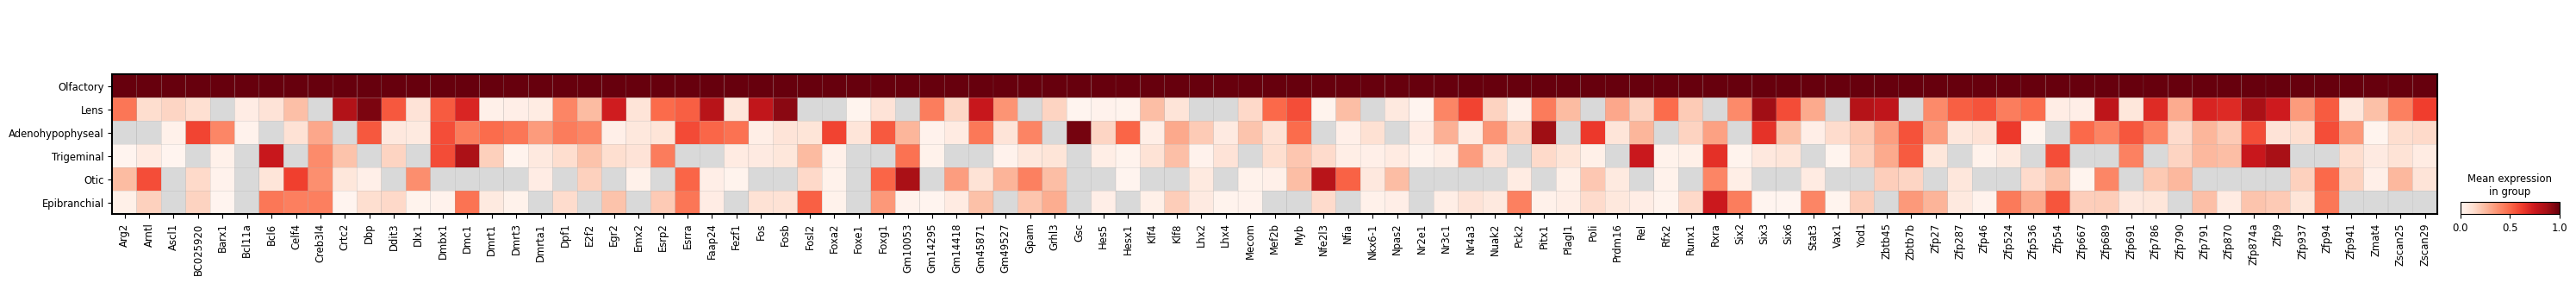

In [ ]:
sc.pl.matrixplot(
    adata_sub,
    var_names=olfactory_list1,
    groupby='cluster_annotations',
    standard_scale='var', cmap=reds_cmap
   # use_raw=True
)

In [ ]:
unique_Olfact2=['Arg2','Arntl', 'Ascl1', 'BC025920', 'Barx1', 'Bcl11a', 'Bcl6', 'Celf4', 'Creb3l4', 'Crtc2', 'Dbp', 'Ddit3',
 'Dlx1','Dmbx1', 'Dmc1','Dmrt1', 'Dmrt3', 'Dmrta1', 'Dpf1', 'E2f2', 'Egr2', 'Emx2','Esrp2','Esrra',
 'Faap24','Fezf1', 'Fos', 'Fosb', 'Fosl2', 'Foxa2', 'Foxe1', 'Foxg1', 'Gm10053', 'Gm14295', 'Gm14418', 'Gm45871',
 'Gm49527', 'Gpam', 'Grhl3', 'Gsc', 'Hes5','Hesx1', 'Klf4', 'Klf8','Lhx2', 'Lhx4', 'Mecom','Mef2b', 'Myb',
 'Nfe2l3','Nfia', 'Nkx6-1', 'Npas2', 'Nr2e1', 'Nr3c1', 'Nr4a3', 'Nuak2', 'Pck2','Pitx1', 'Plagl1', 'Poli', 'Prdm16',
 'Rel', 'Rfx2', 'Runx1', 'Rxra', 'Six2','Six3','Six6', 'Stat3','Vax1','Yod1','Zbtb45','Zbtb7b', 'Zfp27', 'Zfp287','Zfp46',
 'Zfp524', 'Zfp536', 'Zfp54', 'Zfp667', 'Zfp689', 'Zfp691', 'Zfp786', 'Zfp790', 'Zfp791','Zfp870', 'Zfp874a',
 'Zfp9', 'Zfp937', 'Zfp94', 'Zfp941', 'Zmat4', 'Zscan25', 'Zscan29', 'Gli1','Myc',
 'Zfp959', 'Zfp963', 'Zfp971', 'Zfp597', 'Zfp61', 'Zfp623', 'Zfp626', 'Zfp628', 'Zfp653', 'Zfp420', 'Zfp335',
 'Six5', 'Sox21','Prkaa2', '6720489N17Rik', 'AU041133', 'Zfp111']

# adenohypophyseal_list

In [ ]:
adenohypophyseal_list1=[ 'Gm35315','Gsc','Hey2','Nkx2-3', 'Nkx2-5', 'Pitx2',  'Tbx20', 'Tbx3',
'Tlx1', 'Zfp563', 'Pitx2', 'Hey2', 'Pitx2', 'Tbx3', 'Zfp459',   'Hey2', 'Tbx3', 'Zfp459',]

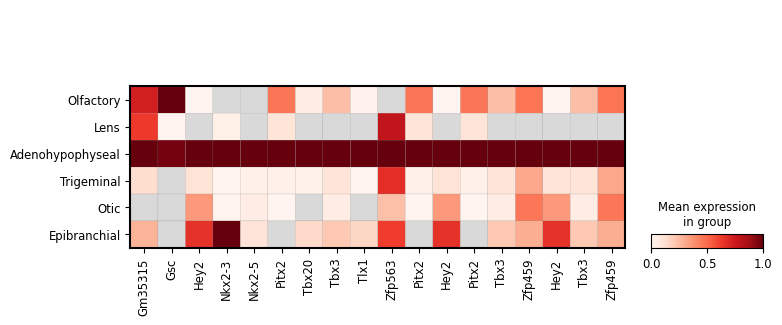

In [ ]:
sc.pl.matrixplot(
    adata_sub,
    var_names=adenohypophyseal_list1,
    groupby='cluster_annotations',
    standard_scale='var', cmap=reds_cmap,  save='adeno_heat.pdf'
   # use_raw=True
)

# epibranchial_list

In [ ]:
epibranchial_list1=['3830417A13Rik', 'Ar','Elf5', 'Elk3', 'Emx1', 'Etv1', 'Fgf15','Foxi2','Foxl2','Gbx2',
'Irx1','Isl2','Lmo2','Maff', 'Neurog2','Nkx2-3', 'Nkx2-6','Prdm1', 'Sox3', 'Sp5','Prdm1', 'Etv1', 'Slc18a1', 'Elk3', 'Etv1', 'Fgf15', 'Gbx2', 'Sox3',
 'Sp5','Prdm1','Elf5','Emx1', 'Prdm1','Scx','Sox3','Sp5',]

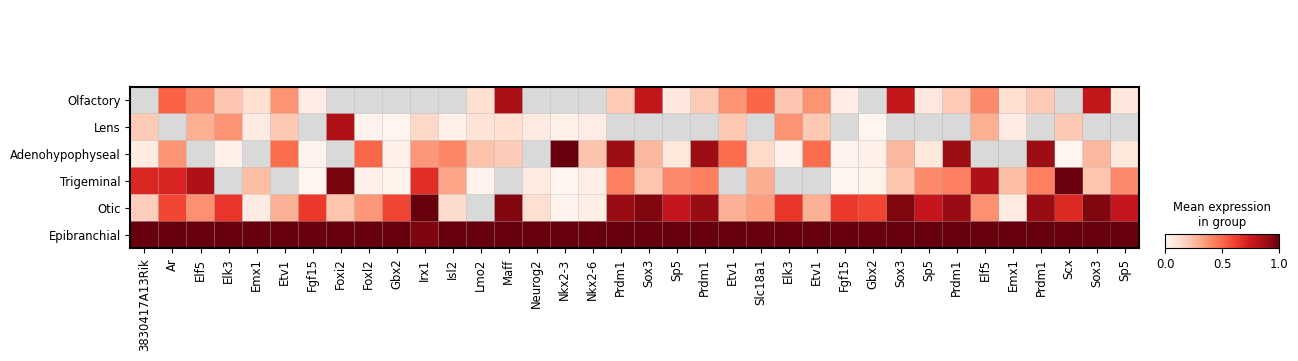

In [ ]:
sc.pl.matrixplot(
    adata_sub,
    var_names=epibranchial_list1,
    groupby='cluster_annotations',
    standard_scale='var', cmap=reds_cmap, save='epi_heat.pdf'
   # use_raw=True
)